# **Titanic competition**

## 1. Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(style="whitegrid", color_codes=True)

In [4]:
%matplotlib inline

## 2. Reading data from csv file

In [5]:
df = pd.read_csv('train.csv', index_col='PassengerId')

In [6]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Checking data for missing values, distributions and use descriptive statistics

### 3.1. Shape of Data Frame

In [7]:
print('Shape of Data Frame is {}x{}'.format(*df.shape))

Shape of Data Frame is 891x11


### 3.2. Check missing values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


+ **we can see that our data have missing values (_Age, Cabin, Embarked_)**

**Okey, let's plot heatmap to visualize missing values**

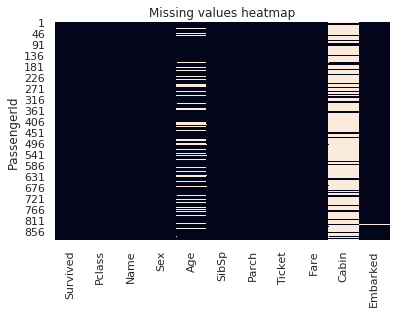

In [9]:
sns.heatmap(df.isnull(), cbar=False).set_title("Missing values heatmap");

**"Canin" and "Age" have many missing values**

### 3.3. Descriptive statistics

In [10]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 3.4. Pair plot

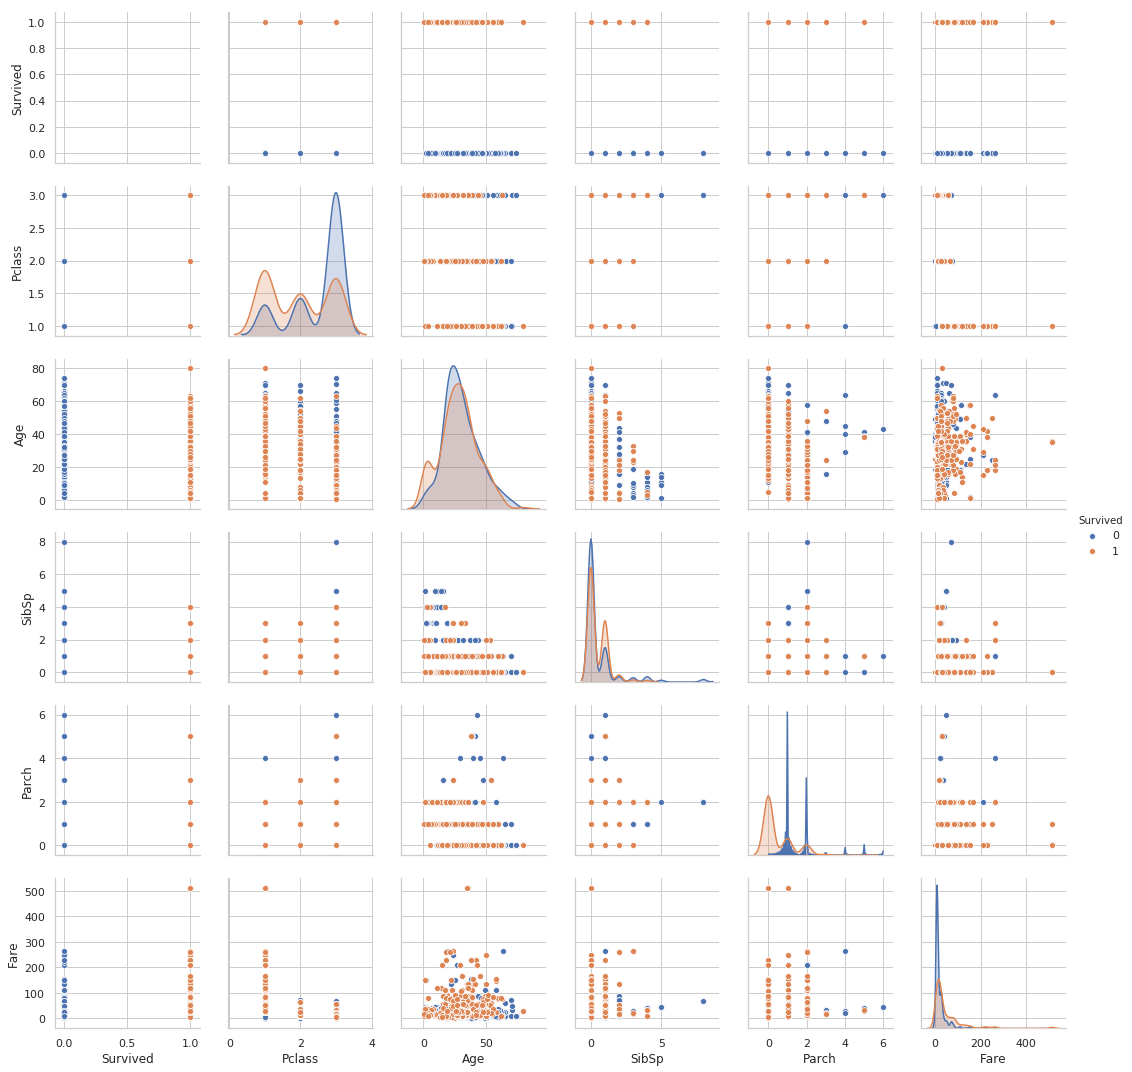

In [11]:
sns.pairplot(df, hue='Survived', diag_kind='auto');

### 3.5. Box plots

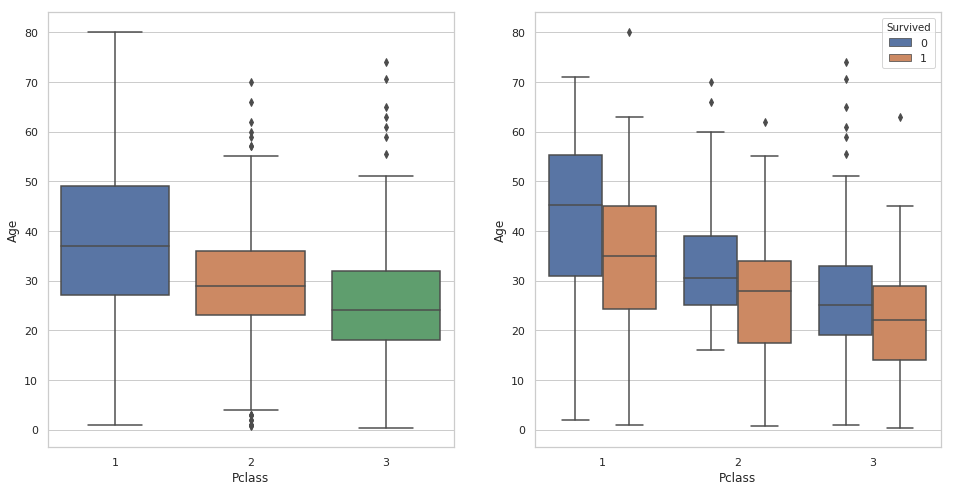

In [12]:
f, axes = plt.subplots(1, 2, figsize=(16,8));

sns.boxplot(y='Age', x='Pclass', data=df, ax=axes[0]);
sns.boxplot(y='Age', x='Pclass', hue='Survived', data=df, ax=axes[1]);

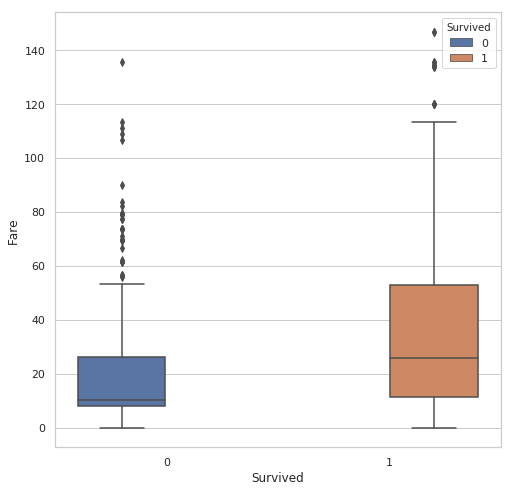

In [13]:
f, axes = plt.subplots(1, 1, figsize=(8,8));

sns.boxplot(y='Fare', x='Survived', hue='Survived', data=df[df['Fare'] < 150], ax=axes);

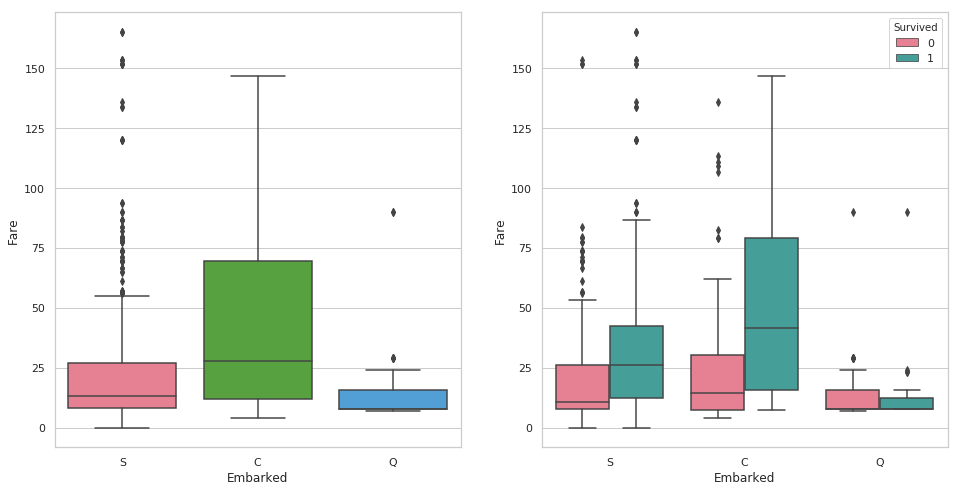

In [14]:
f, axes = plt.subplots(1, 2, figsize=(16,8))

sns.boxplot(y='Fare', x='Embarked', data=df[df['Fare'] < 200], ax=axes[0], palette="husl")
sns.boxplot(y='Fare', x='Embarked', hue='Survived', data=df[df['Fare'] < 200], ax=axes[1], palette="husl")

### 3.6. Count plots

In [15]:
pd.crosstab(df['Embarked'], df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


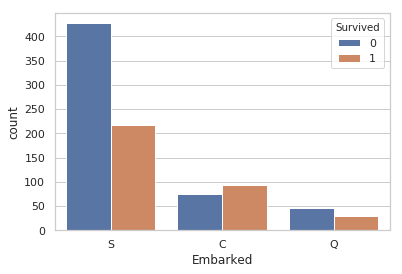

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=df);

In [17]:
pd.crosstab(df['Embarked'].where((df['Pclass'] == 1)), df['Survived'].where((df['Pclass'] == 1)))

Survived,0.0,1.0
Embarked,,
C,26,59
Q,1,1
S,53,74


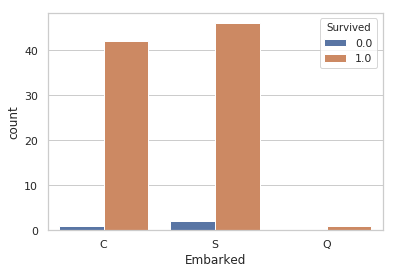

In [18]:
sns.countplot(x='Embarked', hue='Survived', data=df.where((df['Pclass'] == 1) & (df['Sex'] == 'female')));

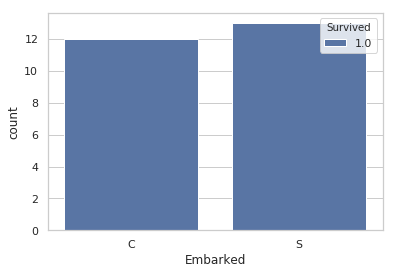

In [19]:
sns.countplot(x='Embarked', hue='Survived', 
              data=df.where((df['Pclass'] == 1) & 
                            (df['Sex'] == 'female') &
                            (df['Cabin'].dropna().apply(lambda x: x[0]).astype(str) == 'B')));

In [20]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df.loc[df['Survived'] == 1, 'Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

### 3.7 Correlation matrix

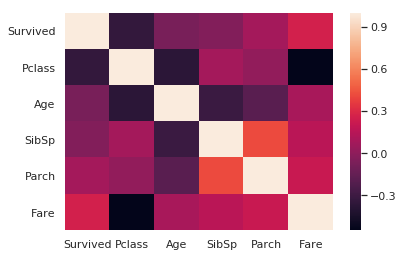

In [22]:
corr = df.corr()
sns.heatmap(corr);

## 4. Feature engineering and filling missing values

In [23]:
from sklearn.preprocessing import StandardScaler

In [27]:
df[df['Embarked'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [24]:
def preproces_name(df):
    title_dict = {'Capt': 'Officer',
                  'Col': 'Officer',
                  'Major': 'Officer',
                  'Jonkheer': 'Royalty',
                  'Don': 'Royalty',
                  'Sir': 'Royalty',
                  'Dr': 'Officer',
                  'Rev': 'Officer',
                  'the Countess': 'Royalty',
                  'Mme': 'Mrs',
                  'Mlle': 'Miss',
                  'Ms': 'Miss',
                  'Mr': 'Mr',
                  'Mrs': 'Mrs',
                  'Miss': 'Miss',
                  'Master': 'Master',
                  'Lady': 'Royalty'
                 
                 }
    
    df['Title'] = df['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
    df['Title'] = df['Title'].map(title_dict)
    
    return df

In [70]:
def preproces_fm_size(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    df['travelled_alone'] = 0
    df.loc[df['FamilySize'] == 1, 'travelled_alone'] = 1
    
    return df

In [71]:
def preproces_pclass(df):
    df['Pclass'] = df['Pclass'].astype(str)
    df.loc[ df['Pclass'] == '1', 'Pclass'] = "Class1"
    df.loc[ df['Pclass'] == '2', 'Pclass'] = "Class2"
    df.loc[ df['Pclass'] == '3', 'Pclass'] = "Class3"
    
    return df

In [72]:
# le_embarked = LabelEncoder()
# le_sex = LabelEncoder()
# le_title = LabelEncoder()
# le_fm = LabelEncoder()

# def preproces_cat_features_fit_transform(df):
#     # df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
#     # df['Sex'] = le_sex.fit_transform(df['Sex'])
#     # df['Title'] = le_title.fit_transform(df['Title'])
#     # df['FamilySize'] = le_fm.fit_transform(df['FamilySize'])
#     encode_col_list = list(df.select_dtypes(include=['object']).columns)
#     for i in encode_col_list:
#         df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
#         df.drop(i, axis = 1, inplace=True)
    
#     return df

def preproces_cat_features(df):
    # df['Embarked'] = le_embarked.transform(df['Embarked'])
    # df['Sex'] = le_sex.transform(df['Sex'])
    # df['Title'] = le_title.transform(df['Title'])
    # df['FamilySize'] = le_fm.transform(df['FamilySize'])
    encode_col_list = list(df.select_dtypes(include=['object']).columns)
    for i in encode_col_list:
        df = pd.concat([df,pd.get_dummies(df[i], prefix=i)],axis=1)
        df.drop(i, axis = 1, inplace=True)
    
    return df

In [73]:
def fill_age(df, row):
    grouped_train = df.groupby(['Sex', 'Pclass', 'Title'])
    grouped_median_train = grouped_train.median()
    grouped_median_train = grouped_median_train.reset_index()[['Sex', 'Pclass', 'Title', 'Age']]
    condition = (
        (grouped_median_train['Sex'] == row['Sex']) &
        (grouped_median_train['Title'] == row['Title']) &
        (grouped_median_train['Pclass'] == row['Pclass'])
    )
    if np.isnan(grouped_median_train[condition]['Age'].values[0]):
        condition = (
            (grouped_median_train['Sex'] == row['Sex']) &
            (grouped_median_train['Pclass'] == row['Pclass'])
        )
        
    return grouped_median_train[condition]['Age'].values[0]

def preproces_age(df):
    df['Age'] = df.apply(lambda row: fill_age(df, row) if np.isnan(row['Age']) else row['Age'], axis=1)
                
    df = preproces_Age_Class(df)
                
    df['Age'] = df['Age'].astype(int)
    df.loc[ df['Age'] <= 11, 'Age'] = 0
    df.loc[(df['Age'] > 11) & (df['Age'] <= 18), 'Age'] = 1
    df.loc[(df['Age'] > 18) & (df['Age'] <= 22), 'Age'] = 2
    df.loc[(df['Age'] > 22) & (df['Age'] <= 27), 'Age'] = 3
    df.loc[(df['Age'] > 27) & (df['Age'] <= 33), 'Age'] = 4
    df.loc[(df['Age'] > 33) & (df['Age'] <= 40), 'Age'] = 5
    df.loc[df['Age'] > 40, 'Age'] = 6
    
    df['Age'] = df['Age'].astype(str)
    df.loc[ df['Age'] == '0', 'Age'] = "Children"
    df.loc[ df['Age'] == '1', 'Age'] = "Teens"
    df.loc[ df['Age'] == '2', 'Age'] = "Youngsters"
    df.loc[ df['Age'] == '3', 'Age'] = "Young Adults"
    df.loc[ df['Age'] == '4', 'Age'] = "Adults"
    df.loc[ df['Age'] == '5', 'Age'] = "Middle Age"
    df.loc[ df['Age'] == '6', 'Age'] = "Senior"
    
    return df

In [74]:
def preproces_fare(df):
    for pclass in range(1, 4):
        print(pclass)
        median = df['Fare'].where((df['Pclass'] == pclass)).median()
        df['Fare'].where((df['Pclass'] == pclass)).fillna(median, inplace=True)
    
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df = preproces_fare_per_person(df)
    
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
    df.loc[(df['Fare'] > 31) & (df['Fare'] <= 99), 'Fare'] = 3
    df.loc[(df['Fare'] > 99) & (df['Fare'] <= 250), 'Fare'] = 4
    df.loc[(df['Fare'] > 250), 'Fare'] = 5
    df['Fare'] = df['Fare'].astype(int)
    
    df['Fare'] = df['Fare'].astype(str)
    df.loc[ df['Fare'] == '0', 'Fare'] = "Extremely Low"
    df.loc[ df['Fare'] == '1', 'Fare'] = "Very Low"
    df.loc[ df['Fare'] == '2', 'Fare'] = "Low"
    df.loc[ df['Fare'] == '3', 'Fare'] = "High"
    df.loc[ df['Fare'] == '4', 'Fare'] = "Very High"
    df.loc[ df['Fare'] == '5', 'Fare'] = "Extremely High"
    
    return df

In [75]:
def preproces_cabin(df):
    df['Cabin'] = df['Cabin'].fillna('Other')
    
    df['Cabin'] = df['Cabin'].map(lambda x: x[0])
    
    return df

In [76]:
def preproces_Age_Class(df):
    df['Age_Class']= df['Age'] * df['Pclass']
    
    return df

In [77]:
def preproces_fare_per_person(df):
    df['Fare_Per_Person'] = df['Fare'] / (df['FamilySize'])
    df['Fare_Per_Person'] = df['Fare_Per_Person'].astype(int)
    
    return df

In [78]:
# def preprocese_cabin_count(df):
#     df['Cabin_count'] = 

In [79]:
# preproces_cabin(df)

In [80]:
# df['Cabin'].value_counts()

In [81]:
scaler = StandardScaler()
def preproces_features(df, train=True):
    global scaler
    df = preproces_name(df)
    df = preproces_fm_size(df)
    df = df.drop('Cabin', axis=1)
#     df = preproces_cabin(df)
    
    df['Embarked'] = df['Embarked'].fillna('S')
#     df['Duplicate_ticket'] = 
    
    df = preproces_fare(df)
    
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}).astype(int)
    
    if train:
        df = df.drop(['Ticket', 'Survived', 'Name'], axis=1)
        df = preproces_age(df)
        df = preproces_pclass(df)
#         df = preproces_cat_features(df) #_fit_transform(df)
        # df = preproces_age_clf(df)
        # df['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] 
        df[['SibSp', 'Parch', 'FamilySize', 'Fare_Per_Person', 'Age_Class']] = scaler.fit_transform(df[['SibSp', 'Parch', 'FamilySize','Fare_Per_Person', 'Age_Class']])
    else:
        df = df.drop(['Ticket', 'Name'], axis=1)
        df = preproces_age(df)
        df = preproces_pclass(df)
#         df = preproces_cat_features(df)
        df[['SibSp', 'Parch', 'FamilySize', 'Fare_Per_Person', 'Age_Class']] = scaler.transform(df[['SibSp','Parch', 'FamilySize','Fare_Per_Person', 'Age_Class']])
    
    return df

In [82]:
y = df['Survived']
train_df = preproces_features(df.copy())

1
2
3


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
Pclass             891 non-null object
Sex                891 non-null int64
Age                891 non-null object
SibSp              891 non-null float64
Parch              891 non-null float64
Fare               891 non-null object
Embarked           891 non-null object
Title              891 non-null object
FamilySize         891 non-null float64
travelled_alone    891 non-null int64
Fare_Per_Person    891 non-null float64
Age_Class          891 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 90.5+ KB


In [86]:
cat_features = np.where((train_df[train_df.columns].dtypes != np.float64))[0]
cat_features

array([0, 1, 2, 5, 6, 7, 9])

In [114]:
cat_features = train_df.columns[cat_features]

In [55]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,travelled_alone,Fare_Per_Person,Age_Class
PassengerId,,,,,,,,,,,,
1,Class3,1,Youngsters,0.432793,-0.473674,Extremely Low,S,Mr,0.059160,0,-0.459218,0.107280
2,Class1,0,Middle Age,0.432793,-0.473674,High,C,Mrs,0.059160,0,0.434090,-0.773074
3,Class3,0,Young Adults,-0.474545,-0.473674,Very Low,S,Miss,-0.560975,0,-0.347554,0.484574
4,Class1,0,Middle Age,0.432793,-0.473674,High,S,Mrs,0.059160,0,0.182847,-0.867398
5,Class3,1,Middle Age,-0.474545,-0.473674,Very Low,S,Mr,-0.560975,0,-0.319638,1.333487


In [340]:
title_column = list(set([x if ('Fare' in x) else '' for x in train_df.columns]))
title_column.remove('')
title_column.remove('Fare_Per_Person')

In [341]:
train_df[title_column].mean() * len(train_df)

Fare_Extremely High      9.0
Fare_Extremely Low     223.0
Fare_High              169.0
Fare_Low               229.0
Fare_Very High          44.0
Fare_Very Low          217.0
dtype: float64

## 5. PCA, TSNE, MDS and correlation matrix

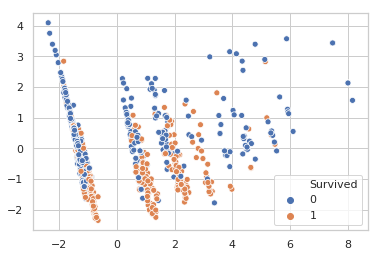

In [237]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
X_pca =  model_pca.fit_transform(train_df)

sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y_train)


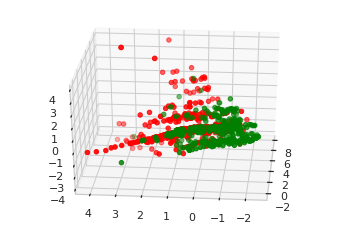

In [238]:
from mpl_toolkits.mplot3d import Axes3D


model_pca = PCA(n_components=3)
X_pca =  model_pca.fit_transform(train_df)

X1 = []
X0 = []
for i, yy in enumerate(y_train):
    if yy == 1:
        X1.append(list(X_pca[i]))
    else:
        X0.append(list(X_pca[i]))
        
X0 = np.array(X0)
X1 = np.array(X1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='red', s=20)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='green', s=20)
ax.view_init(30, 185)
plt.show()

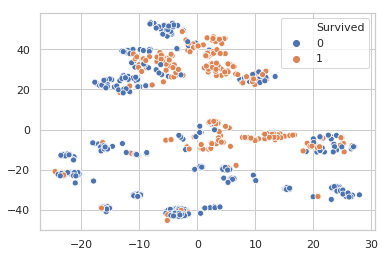

In [239]:
from sklearn.manifold import TSNE

model_tsne = TSNE(n_components=2)
X_tsne =  model_tsne.fit_transform(train_df)

sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=y_train)

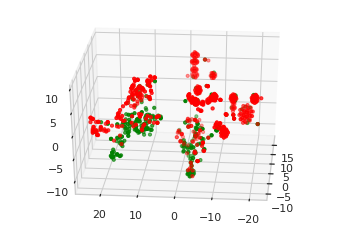

In [240]:
from mpl_toolkits.mplot3d import Axes3D

model_tsne = TSNE(n_components=3)
X_tsne =  model_tsne.fit_transform(train_df)

X1 = []
X0 = []
for i, yy in enumerate(y_train):
    if yy == 1:
        X1.append(list(X_tsne[i]))
    else:
        X0.append(list(X_tsne[i]))
        
X0 = np.array(X0)
X1 = np.array(X1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='red', s=10)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='green', s=10)
ax.view_init(30, 185)
plt.show()

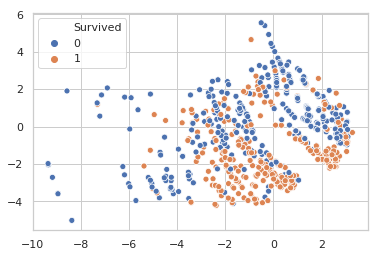

In [241]:
from sklearn.manifold import MDS

model_mds = MDS(n_components=2)
X_mds =  model_mds.fit_transform(train_df)

sns.scatterplot(X_mds[:, 0], X_mds[:, 1], hue=y_train)

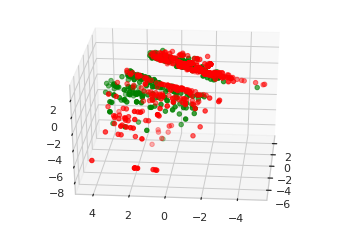

In [243]:
from mpl_toolkits.mplot3d import Axes3D

model_mds = MDS(n_components=3)
X_mds =  model_mds.fit_transform(train_df)

X1 = []
X0 = []
for i, yy in enumerate(y_train):
    if yy == 1:
        X1.append(list(X_mds[i]))
    else:
        X0.append(list(X_mds[i]))
        
X0 = np.array(X0)
X1 = np.array(X1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0[:, 0], X0[:, 1], X0[:, 2], c='red', s=20)
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c='green', s=20)
ax.view_init(30, 185)
plt.show()

## 6. Prediction model

In [87]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train_df, y, shuffle=True, random_state=17, test_size=0.2)

In [89]:
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=17)

In [90]:
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

In [91]:
best_xgb_clf = None

def xgb_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global best_xgb_clf
    scoring = 'accuracy'

    params = {
        'n_estimators': [500, 1000],
        'max_depth': [6 , 7, 8, 9],
        'learning_rate': [0.01, 0.05, 0.001],
        'reg_alpha': np.linspace(1, 2, 4),
        'reg_lambda': np.linspace(4, 5, 4)
    }
    
    xgb_model = XGBClassifier(objective='binary:logistic', nthreads=2)
    
    grid = GridSearchCV(xgb_model, param_grid=params, n_jobs=-1, verbose=1, scoring=scoring, cv=cv)
    
    grid.fit(train_df, y_train)
    
    best_xgb_clf = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = best_xgb_clf.predict(test_df)
    
    return prediction

In [92]:
best_svc = None
def svm_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global best_svc
    scoring = 'accuracy'
    params = {
        #'C': [0.1, 0.5, 1, 5, 0.55, 0.45],
        'C': np.linspace(0.5, 2, 100),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': [*np.logspace(-9, 3, 5), 'scale'],
        'tol': [0.001, 0.01, 0.0001],
#         'class_weight':['balanced'],
        'decision_function_shape' : ['ovo', 'ovr'],
        'tol': [0.001],
#         'gamma': ['scale'],
        'kernel': ['rbf'],
        'random_state': [0],
        #'C': [0.1653061224489796],
        'decision_function_shape' : ['ovo']
    }
    
    svc_model = SVC()
    grid = GridSearchCV(svc_model, param_grid=params, n_jobs=-1, verbose=1, scoring=scoring, cv=cv)
    grid.fit(train_df, y_train)
    
    best_svc = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = best_svc.predict(test_df)
    
    return prediction

In [93]:
log_reg = None
def log_reg_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global log_reg
    scoring = 'accuracy'
    params = {
        #'C': [0.1, 0.5, 1, 5, 0.55, 0.45, 0.9],
        'C': np.linspace(0.1, 2, 50),
        # 'penalty': ['l1', 'l2'],
        
        'penalty': ['l2'],
        'tol': [0.001],
        'max_iter': [100, 1000],
        #'random_state': [0],
        #'C': [0.94081632653061231],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }
    
    log_reg = LogisticRegression()
    grid = GridSearchCV(log_reg, param_grid=params, n_jobs=-1, verbose=1, scoring=scoring, cv=cv)
    grid.fit(train_df, y_train)
    
    log_reg = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = log_reg.predict(test_df)
    
    return prediction

In [94]:
best_rf = None
def rf_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global best_rf
    scoring = 'accuracy'
    params = { 
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4, 5, 6, 7, 8],
        'criterion' :['gini', 'entropy']
    }
    
    best_rf = RandomForestClassifier(random_state=42)
    grid = GridSearchCV(best_rf, param_grid=params, n_jobs=-1, verbose=1, scoring=scoring, cv=cv)
    grid.fit(train_df, y_train)
    
    best_rf = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = best_rf.predict(test_df)
    
    return prediction

In [95]:
best_gb = None
def gb_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global best_rf
    scoring = 'accuracy'
    params = { 
        "learning_rate": [0.01, 0.05, 0.001],
        "min_samples_split": np.linspace(0.1, 0.5, 5),
        "min_samples_leaf": np.linspace(0.1, 0.5, 5),
        "max_depth":[3,5,8],
        "max_features":["log2","sqrt"],
        "criterion": ["friedman_mse",  "mae"],
        "subsample":np.linspace(0.5, 1, 5),
        "n_estimators":[10]
    }
    
    best_gb = GradientBoostingClassifier(random_state=42)
    grid = GridSearchCV(best_gb, param_grid=params, n_jobs=-1, verbose=1, scoring=scoring, cv=cv)
    grid.fit(train_df, y_train)
    
    best_gb = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = best_gb.predict(test_df)
    
    return prediction

In [152]:
best_cat = None
def cat_clf(train_df=None, y_train=None, test_df=None, cv=5):
    global best_cat
    scoring = 'accuracy'
    params = { 
        'iterations': [500],
        'depth': [4, 5, 8],
#         'learning_rate' : [4, 5, 6, 7, 8],
        'loss_function': ['Logloss', 'CrossEntropy'],
        'l2_leaf_reg': np.logspace(-20, -19, 3),
    }
    
    best_cat = CatBoostClassifier()
    grid = GridSearchCV(best_cat, param_grid=params, verbose=1, cv=cv)
    grid.fit(train_df, y_train, cat_features=cat_features, verbose=False)
    
    best_cat = grid.best_estimator_
    print(grid.best_params_, grid.best_score_)
    
    prediction = best_cat.predict(test_df)
    
    return prediction

In [131]:
model = CatBoostClassifier(iterations=500,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=False)

In [132]:
model.fit(X_train, y_train, cat_features=cat_features)

In [100]:
test_df = pd.read_csv('test.csv', index_col='PassengerId')

In [160]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [161]:
test = preproces_features(test_df.copy(), train=False)

1
2
3


In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Pclass             418 non-null object
Sex                418 non-null int64
Age                418 non-null object
SibSp              418 non-null float64
Parch              418 non-null float64
Fare               418 non-null object
Embarked           418 non-null object
Title              417 non-null object
FamilySize         418 non-null float64
travelled_alone    418 non-null int64
Fare_Per_Person    418 non-null float64
Age_Class          418 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 42.5+ KB


In [166]:
test[test['Title'].isna()]
test['Title'].fillna('na', inplace=True)

In [345]:
test['Title_Royalty'] = 0
# test['Cabin_T'] = 0

In [103]:
test = test[train_df.columns]

In [104]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,travelled_alone,Fare_Per_Person,Age_Class
PassengerId,,,,,,,,,,,,
892,Class3,1,Middle Age,-0.474545,-0.473674,Extremely Low,Q,Mr,-0.560975,1,-0.347554,1.286325
893,Class3,0,Senior,0.432793,-0.473674,Extremely Low,S,Mrs,0.059160,0,-0.459218,2.465370
894,Class2,1,Senior,-0.474545,-0.473674,Very Low,Q,Mr,-0.560975,1,-0.291722,1.930870
895,Class3,1,Young Adults,-0.474545,-0.473674,Very Low,S,Mr,-0.560975,1,-0.319638,0.578898
896,Class3,0,Youngsters,0.432793,0.767630,Very Low,S,Mrs,0.679295,0,-0.431302,0.107280


In [378]:
pred_rf = rf_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.2s


{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200} 0.8361391694725028


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   52.7s finished


In [379]:
pred_gb = gb_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 4500 candidates, totalling 22500 fits


[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2216 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 5216 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 9416 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 14816 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 21416 tasks      | elapsed:  2.3min


{'criterion': 'friedman_mse', 'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 10, 'subsample': 1.0} 0.7407407407407407


[Parallel(n_jobs=-1)]: Done 22500 out of 22500 | elapsed:  2.4min finished
/home/roman/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [380]:
pred_xgb = xgb_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 15.8min finished


{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'reg_alpha': 1.0, 'reg_lambda': 4.333333333333333} 0.8395061728395061


In [381]:
pred_svm = svm_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 355 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 855 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1555 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 2455 tasks      | elapsed:   55.0s


{'C': 0.5, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0, 'tol': 0.001} 0.8338945005611672


[Parallel(n_jobs=-1)]: Done 2993 out of 3000 | elapsed:  1.1min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:  1.1min finished


In [382]:
pred_log = log_reg_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   21.1s


{'C': 0.44897959183673475, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.001} 0.8282828282828283


[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   29.8s finished


In [153]:
pred_cat = cat_clf(test_df=X_test, train_df=train_df, y_train=y, cv=kf)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  9.6min finished


{'depth': 5, 'iterations': 500, 'l2_leaf_reg': 1e-20, 'loss_function': 'Logloss'} 0.835016835016835


In [154]:
# best_xgb_clf.get_params()
# best_svc.get_params()
# log_reg.get_params()

In [155]:
gender_subm = pd.read_csv('gender_submission.csv')

In [156]:
gender_subm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [146]:
from sklearn.metrics import classification_report

In [371]:
print(classification_report(y_test, pred_rf))
print(cross_val_score(best_rf, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       106
           1       0.82      0.74      0.78        73

   micro avg       0.83      0.83      0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

0.767423460612315


In [372]:
print(classification_report(y_test, pred_gb))
print(cross_val_score(best_gb, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.67      0.95      0.79       106
           1       0.82      0.32      0.46        73

   micro avg       0.69      0.69      0.69       179
   macro avg       0.75      0.63      0.62       179
weighted avg       0.73      0.69      0.65       179



TypeError: estimator should be an estimator implementing 'fit' method, None was passed

In [373]:
print(classification_report(y_test, pred_log))
print(cross_val_score(log_reg, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       106
           1       0.77      0.73      0.75        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

0.7828517371861026


In [376]:
print(classification_report(y_test, pred_svm))
print(cross_val_score(best_svc, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       106
           1       0.80      0.71      0.75        73

   micro avg       0.81      0.81      0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

0.8004987960096319


In [377]:
print(classification_report(y_test, pred_xgb))
print(cross_val_score(best_xgb_clf, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       106
           1       0.78      0.73      0.75        73

   micro avg       0.80      0.80      0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

0.8063811489508084


In [157]:
print(classification_report(y_test, pred_cat))
print(cross_val_score(best_cat, X_test, y=y_test, cv=10).mean())

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       106
           1       0.80      0.77      0.78        73

   micro avg       0.83      0.83      0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



CatBoostError: Bad value for num_feature[0,0]="Class2": Cannot convert 'b'Class2'' to float

## 7. Get prediction for test

In [148]:
pred_svc = best_svc.predict(test)
pred_rf = best_rf.predict(test)
pred_xgb = best_xgb_clf.predict(test)
pred_log = log_reg.predict(test)

AttributeError: 'NoneType' object has no attribute 'predict'

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
Pclass             418 non-null object
Sex                418 non-null int64
Age                418 non-null object
SibSp              418 non-null float64
Parch              418 non-null float64
Fare               418 non-null object
Embarked           418 non-null object
Title              417 non-null object
FamilySize         418 non-null float64
travelled_alone    418 non-null int64
Fare_Per_Person    418 non-null float64
Age_Class          418 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 42.5+ KB


In [170]:
pred_cat = best_cat.predict(test).astype(int)

In [387]:
gender_subm['Survived'] = pred_svc
gender_subm.to_csv('my_subm_svc.csv', index=False)

gender_subm['Survived'] = pred_rf
gender_subm.to_csv('my_subm_rf.csv', index=False)

gender_subm['Survived'] = pred_xgb
gender_subm.to_csv('my_subm_xgb.csv', index=False)

gender_subm['Survived'] = pred_log
gender_subm.to_csv('my_subm_log.csv', index=False)

In [171]:
gender_subm['Survived'] = pred_cat
gender_subm.to_csv('my_subm_cat.csv', index=False)